# Laptop Price Predictor

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os # Path to file
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt # Data visulization
import seaborn as sns  # Data visulization
import warnings # warning filter
%matplotlib inline


## Setting Seaborn
sns.set(style='white', context='paper', palette='cividis')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop/laptop_data.csv


In [3]:
lap_df = pd.read_csv('/kaggle/input/laptop/laptop_data.csv')
lap_df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
33,33,Dell,Ultrabook,13.3,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,99580.32
786,786,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,58021.92
86,86,HP,Ultrabook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 940MX,Windows 10,1.83kg,37242.72
676,676,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.1kg,60472.80
1272,1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12


# Data Process 
* **Data Shape**
* **Data Head/Sample**
* **Data Types**
* **Missing Values**
* **Describe Data**
* **Data Duplicates**
* **Data Correlation**

In [4]:
# Shape
print(f'Dataset (row,col): {lap_df.shape}')

Dataset (row,col): (1303, 12)


In [5]:
# Sample 
lap_df.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
100,100,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,1.91kg,38308.320
816,816,Razer,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,95850.720
793,793,Lenovo,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M460,Windows 10,2.08kg,51095.520
437,437,Google,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i7 7Y75 1.3GHz,16GB,512GB SSD,Intel HD Graphics 615,Chrome OS,1.1kg,117162.720
515,515,Asus,Netbook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.1kg,13053.600
271,271,Asus,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,16GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,82530.720
207,207,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.21kg,103842.720
1247,1247,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.34kg,123876.000
825,825,Toshiba,Notebook,14.0,1366x768,Intel Pentium Dual Core 4405U 2.1GHz,4GB,128GB SSD,Intel HD Graphics 510,Windows 10,1.75kg,26586.720
418,418,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.14kg,28768.536


In [6]:
# check column types
lap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
# Missing values
print(f'Missing values in Dataset:\n{lap_df.isnull().sum()}')

Missing values in Dataset:
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [8]:
# Descirbe Data
lap_df.describe(include=['number', 'object'])

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1303.00000,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,727,NaN,507,190,619,412,281,1072,121,NaN
mean,651.00000,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59870.042910
std,376.28801,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37243.201786
min,0.00000,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9270.720000
25%,325.50000,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31914.720000
50%,651.00000,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52054.560000
75%,976.50000,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79274.246400


In [9]:
# Duplicates
print(f'Duplicates in Dataset: {lap_df.duplicated().sum()}')

Duplicates in Dataset: 0


Text(0.5, 1.0, 'Correlations in  Dataset\n')

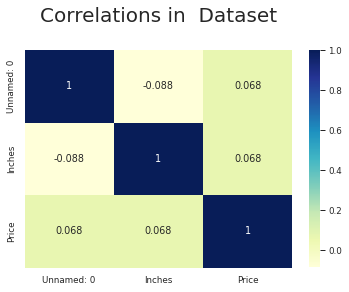

In [10]:
# Correlation in dataset
ax = sns.heatmap(lap_df.corr(), cmap='YlGnBu', annot=True)
ax.set_title('Correlations in  Dataset\n', fontsize=20)

### About Data 
This Dataset consist **1303 rows** and **12 columns**, containing **0** **missing values** and **duplicates**.

#### Description:
    Dataset contains information about **laptops** 

#### Columns:
    ** Company **:             Laptop Company Name
    ** TypeName **:            Laptop Type
    ** Inches **:              Laptop size
    ** ScreenResolution **:    Screen Size
    ** Cpu **:                 CPU Information
    ** Ram **:                 Laptop Ram
    ** Memory **:              Laptop Memory
    ** Gpu **:                 Information about Graphics
    ** OpSys **:               Operating System
    ** Weight **:              Laptop Weight
    ** Price **:               Laptop Price

#### Key Veriables:
    ** ScreenResolution **: Veriable contains **more information** like (HD,4K support, resolution pixels etc)
    ** Cpu **:              Veriable contains **more information** like (processerType, processerSpeed etc)
    ** Gpu **:              Veriable contains **more information** like (Graphic's Company Name, GraphicMem etc)
    ** Memory **:           Veriable contains **more information** like (diskType, Disk size etc)
    
    
#### Observations:
    Most Sold Laptops are from Dell.
    Most Sold Laptops are notebooks.
    Laptops are mostly 15 inches.
    Most Laptops are HD Supported.
    Most Laptops are Intel core i5.
    Most Laptops have 8GB Ram.
    Most Laptops have 256SSD Memory.
    Most Laptops have intel Graphics.
    Most Laptops have window 10 OpSys.
    Most Laptops have almost 2kg weight.
    Laptop Average Price is 31914
    
#### Points to Note:
    Convert weight into numeric.
    Convert Ram into numeric.
    Delete unnamed 0.

In [11]:
# remove Unnamed 0:
lap_df = lap_df[lap_df.columns[1:]]

# Convert weight into numeric
lap_df['Ram'] = lap_df['Ram'].apply(lambda i:i[0]).astype('int')

# Convert weight into numeric
lap_df['Weight'] = lap_df['Weight'].apply(lambda i:i[:-2]).astype('float')


In [12]:
# Check Data
lap_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,1,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


# Exploratory Data Analysis

Text(0.5, 1.0, 'Correlations in  Dataset\n')

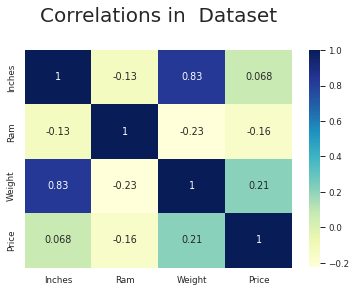

In [13]:
# Correlation in dataset
ax = sns.heatmap(lap_df.corr(), cmap='YlGnBu', annot=True)
ax.set_title('Correlations in  Dataset\n', fontsize=20)

### Observations
* **Price and Inches has slightly +ve relation.**
* **Price and Ram has slightly -ve relation which is strange.**
* **Price and Weight has +ve relation.**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


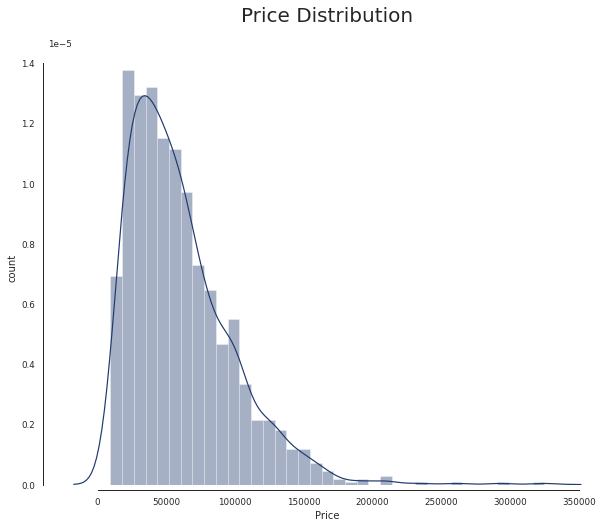

In [14]:
# Price Disribution
plt.figure(figsize=(10,8))
ax = sns.distplot(x=lap_df['Price'])
ax.set_title('Price Distribution\n', fontsize=20)
ax.set_xlabel('Price', fontsize=10)
ax.set_ylabel('count', fontsize=10)
sns.despine(offset=5, trim=True)

#### Observations:
* **Price is skewed towords right ( laptops with high price are less)**

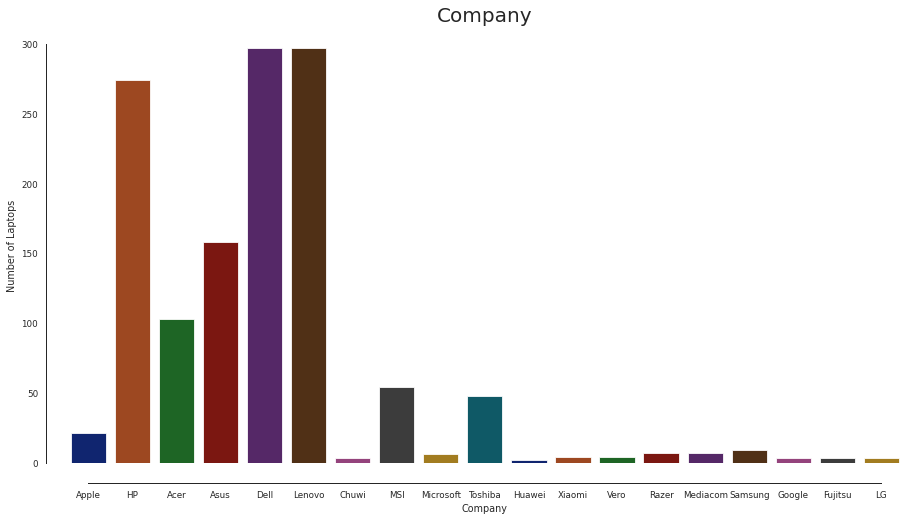

In [15]:
# Explore Company
plt.figure(figsize=(15,8))
ax = sns.countplot(data=lap_df, x='Company', palette='dark')
ax.set_title('Company', fontsize=20)
ax.set_ylabel('Number of Laptops')
sns.despine(offset=20, trim=True)

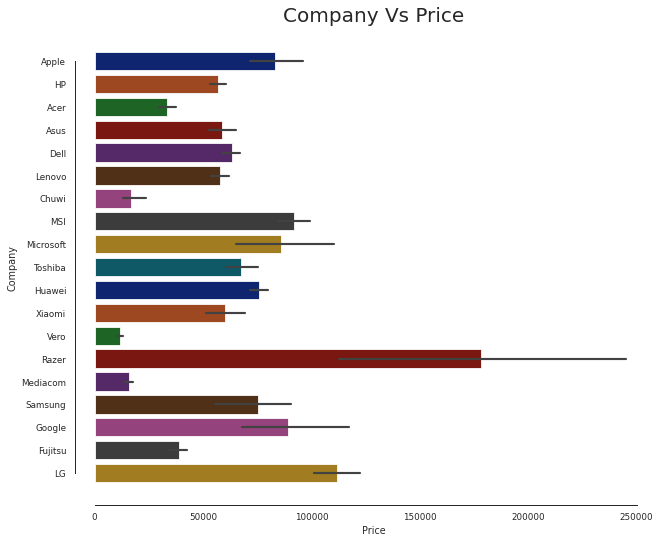

In [16]:
# Explore Company
plt.figure(figsize=(10,8))
ax = sns.barplot(data=lap_df, x='Price', y='Company', palette='dark')
ax.set_title('Company Vs Price\n', fontsize=20)
sns.despine(offset=20, trim=True)

#### Realizations:
* **Popular** Companies are **Dell** and **Lenovo**.
* **Razer** Company has most **expensive** Laptops.
* **Vero** Company has most **cheapest** Laptops.
* **Price** **veries** with **Company Name**